# Astropy Quantities

In [1]:
import numpy as np
from astropy import units as u 

In [2]:
q = 42.0 * u.m 
lengths = [1,2,3]*u.m

In [3]:
print(q.value,q.unit) #Ofcourse, we can use q.value with any other command also

print(lengths.value,q.unit)
print(lengths[0].value , lengths[0].unit)

42.0 m
[1. 2. 3.] m
1.0 m


In [4]:
distance2 =45 * u.m
distance1 =5*u.m
time = 2 * u.s

In [5]:
speed = (distance2 - distance1)/time
print(speed)

20.0 m / s


In [6]:
print(speed.to(u.km/u.hour))
print(speed.value)
print(speed.unit)
print((1*u.Joule).cgs)
print((10*u.cm).si)

72.0 km / h
20.0
m / s
10000000.0 erg
0.1 m


In [7]:
mph = u.imperial.mile/u.hour #astropy.units.imperial is the module for fps units
print(speed.to(mph))

44.73872584108805 mi / h


In [8]:
refractive_index = 1.5 *u.dimensionless_unscaled
print(refractive_index.value,refractive_index.unit) #No unit is printed, as the quantity is dimensionless

distance_ratio1 = (1*u.m)/(2*u.m)
print(distance_ratio1.value,distance_ratio1.unit)#This is a true unscaled dimensionless quantity

distance_ratio2 = (1*u.km)/(2*u.m)
print(distance_ratio2.value,distance_ratio2.unit)#This is also dimensionless, but value is scaled

print(distance_ratio1.unit == refractive_index.unit)#both are dimensionless unscaled
print(distance_ratio1.unit == distance_ratio2.unit)#both are dimensionless, but one is scaled, the other is not

1.5 
0.5 
0.5 km / m
True
False


In [9]:
r = 1*u.AU
d = 1*u.parsec
print(d/r)
print(float(d/r)) #Notice how the float method is used to convert dimensionless scaled quatities to numbers
                  #The float method will not work with quantities having some dimension

AvgDensity_of_sun = 1*u.Msun/(4*np.pi/3*(1*u.Rsun)**3)
print(AvgDensity_of_sun.to(u.kg/u.m**3)) #Side note: note how this quite close to density of water

1.0 pc / AU
206264.80624709633
1409.7798243075256 kg / m3


In [10]:
print((1000 * u.nm).to(u.Hz, equivalencies=u.spectral()))  

299792457999999.94 Hz


# Filters in Astronomy

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const

In [12]:
h = const.h
print(h)

  Name   = Planck constant
  Value  = 6.62607015e-34
  Uncertainty  = 0.0
  Unit  = J s
  Reference = CODATA 2018


In [13]:
c = const.c
kB = const.k_B

In [14]:
def B(wl,T): #lambda is a reserved keyword in python, so wavelength is assigned variable wl
    exponential = 1/(np.exp(h*c/(wl*kB*T))-1)
    prefactor = 2*np.pi*h*c*c/wl**5
    return prefactor*exponential

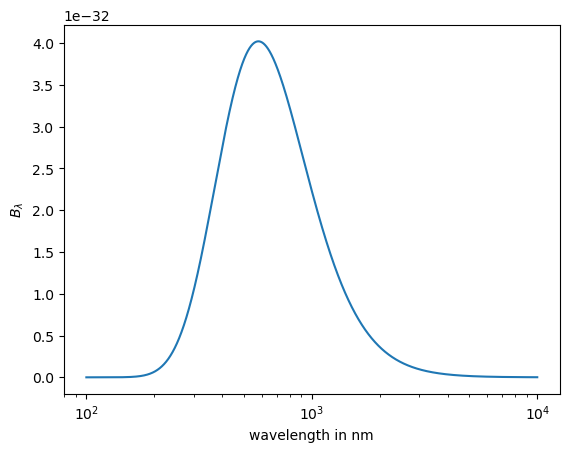

In [15]:
plt.style.use('default')
wl0 = np.linspace(100,10000,1000000)*u.nm
T0 = 5000 *u.K
plt.xscale('log')
plt.xlabel('wavelength in nm')
plt.ylabel('$B_\lambda$')
plt.plot(wl0.value,B(wl0,T0).value)
plt.show()

In [16]:
from astropy.io import fits

In [17]:
SDSS_filter = fits.open('filter_curves.fits')
SDSS_filter.info()

Filename: filter_curves.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      63   ()      
  1  U             1 BinTableHDU     20   47R x 5C   [E, E, E, E, E]   
  2  G             1 BinTableHDU     20   89R x 5C   [E, E, E, E, E]   
  3  R             1 BinTableHDU     20   75R x 5C   [E, E, E, E, E]   
  4  I             1 BinTableHDU     20   89R x 5C   [E, E, E, E, E]   
  5  Z             1 BinTableHDU     20   141R x 5C   [E, E, E, E, E]   


In [18]:
SDSS_filter[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   20 / length of dimension 1                          
NAXIS2  =                   47 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    5 / number of table fields                         
TTYPE1  = 'wavelength'                                                          
TFORM1  = 'E       '                                                            
TUNIT1  = 'angstrom'                                                            
TTYPE2  = 'respt   '                                                            
TFORM2  = 'E       '        

In [19]:
U = SDSS_filter[1].data
G = SDSS_filter[2].data
R = SDSS_filter[3].data
I = SDSS_filter[4].data
Z = SDSS_filter[5].data

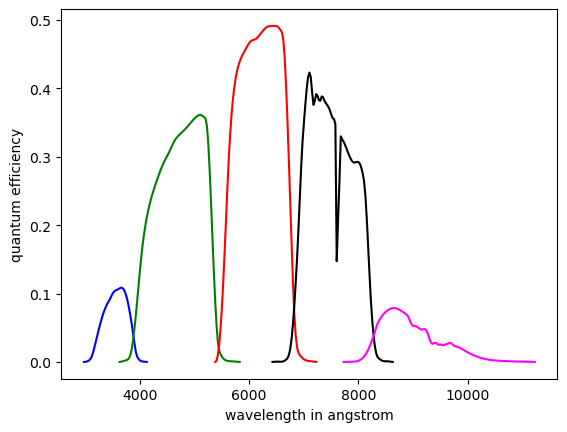

In [20]:
plt.plot(U['wavelength'],U['respt'],color='blue') 
plt.plot(G['wavelength'],G['respt'],color='green')
plt.plot(R['wavelength'],R['respt'],color='red')
plt.plot(I['wavelength'],I['respt'],color='black')
plt.plot(Z['wavelength'],Z['respt'],color='magenta')
plt.ylabel('quantum efficiency')
plt.xlabel('wavelength in angstrom')
plt.show()

In [21]:
wavelengths = G['wavelength']*u.AA #Angstroms
qG = G['respt'] 
Tsirius = 9940 * u.K
r_sirius = 1.711*u.Rsun
d_sirius = 2.64 * u.pc 

In [22]:
integral = 0*u.W/u.m**2
i = 1
while i < len(wavelengths):
    integral += B((wavelengths[i-1]+wavelengths[i])/2 , Tsirius)*(qG[i-1]+qG[i])/2*(wavelengths[i]-wavelengths[i-1])
    i = i + 1
intensity = integral*(r_sirius/d_sirius)**2
print(intensity.to(u.W/u.m**2))

7.024221695949649e-09 W / m2


# Assignment

In [31]:
intensity_G = 1.3887e-09 * (u.W / u.m**2)
intensity_R = 2.5553e-09 * (u.W / u.m**2)

In [32]:
ratio_arcturus = intensity_G/intensity_R
print(ratio_arcturus)

0.5434586936954565


In [33]:
wlG = G['wavelength']*u.AA
qG = G['respt']
wlR = R['wavelength']*u.AA
qR = R['respt']

In [34]:
def G_R_ratio(T):
    integral_G = 0*u.W/u.m**2
    integral_R = 0*u.W/u.m**2
    i = 1
    while i < len(wlR):
        integral_R += B((wlR[i-1]+wlR[i])/2 , T)*(qR[i-1]+qR[i])/2*(wlR[i]-wlR[i-1])
        i = i + 1
    j = 1
    while j < len(wlG):
        integral_G += B((wlG[j-1]+wlG[j])/2 , T)*(qG[j-1]+qG[j])/2*(wlG[j]-wlG[j-1])
        j = j + 1
    return (integral_G/integral_R)

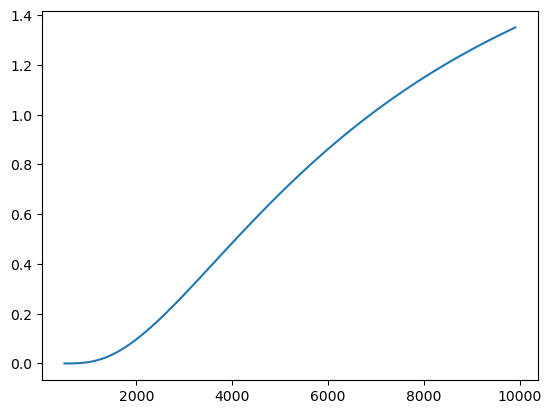

In [36]:
Temps = np.arange(500,10000,100)*u.K
GR = []
for t in Temps:
    GR.append(G_R_ratio(t))
plt.plot(Temps.value,GR)
plt.show()

In [37]:
difference = np.abs(GR - ratio_arcturus)
T_arcturus = Temps[np.where(difference == np.amin(difference))][0]
print(T_arcturus)

4300.0 K
